## 算数运算原则

     算数运算根据行列索引，补齐后运算，运算默认产生浮点数
     
     补齐时缺项填充NaN（空值）
     
     二维和一维，一维和零维间为广播运算
     
     

In [1]:
import pandas as pd
import numpy as np

In [2]:
a = pd.DataFrame(np.arange(12).reshape(3,4))

In [3]:
a

,0,1,2,3
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11


In [4]:
b = pd.DataFrame(np.arange(20).reshape(4,5))

In [5]:
b

,0,1,2,3,4
0,0,1,2,3,4
1,5,6,7,8,9
2,10,11,12,13,14
3,15,16,17,18,19


In [6]:
a+b
# 标签相同的进行运算，标签不同的补齐后运算

,0,1,2,3,4
0,0.0,2.0,4.0,6.0,NaN
1,9.0,11.0,13.0,15.0,NaN
2,18.0,20.0,22.0,24.0,NaN
3,NaN,NaN,NaN,NaN,NaN


### 数据类型的算数运算方法

优点：可以附加参数补全缺失项

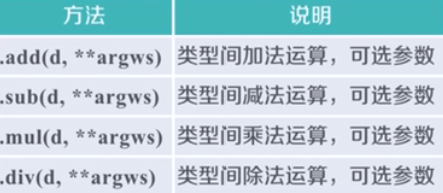

In [9]:
b.add(a,fill_value = 100)
#替代缺失值，替代后进行运算

,0,1,2,3,4
0,0.0,2.0,4.0,6.0,104.0
1,9.0,11.0,13.0,15.0,109.0
2,18.0,20.0,22.0,24.0,114.0
3,115.0,116.0,117.0,118.0,119.0


In [7]:
a*b

,0,1,2,3,4
0,0.0,1.0,4.0,9.0,NaN
1,20.0,30.0,42.0,56.0,NaN
2,80.0,99.0,120.0,143.0,NaN
3,NaN,NaN,NaN,NaN,NaN


### 广播运算：低维的数会作用在高维的每一个元素上

默认在axis = 1 上进行运算

对两个数组，分别比较他们的每一个维度（若其中一个数组没有当前维度则忽略），满足：

    数组拥有相同形状。
    当前维度的值相等。
    当前维度的值有一个是 1。
    若条件不满足，抛出 "ValueError: frames are not aligned" 异常。

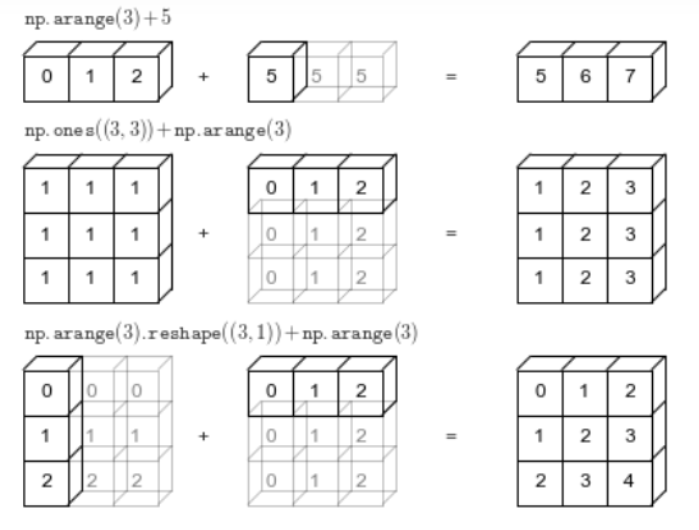

In [11]:
c = pd.Series(np.arange(4))

In [12]:
c

0    0
1    1
2    2
3    3
dtype: int32

In [15]:
b

,0,1,2,3,4
0,0,1,2,3,4
1,5,6,7,8,9
2,10,11,12,13,14
3,15,16,17,18,19


In [13]:
c-10
#每一个c中的元素都

0   -10
1    -9
2    -8
3    -7
dtype: int32

In [19]:
b-c
#b中的每一行都与c做了运算
#第5列c中不存在所以无法计算，返回NaN

,0,1,2,3,4
0,0.0,0.0,0.0,0.0,NaN
1,5.0,5.0,5.0,5.0,NaN
2,10.0,10.0,10.0,10.0,NaN
3,15.0,15.0,15.0,15.0,NaN


In [16]:
#指定每一行都进行运算
b.sub(c,axis =0)

,0,1,2,3,4
0,0,1,2,3,4
1,4,5,6,7,8
2,8,9,10,11,12
3,12,13,14,15,16


### 数据类型的比较运算

不同维度的也采用广播运算

In [20]:
a = pd.DataFrame(np.arange(12).reshape(3,4))

In [21]:
a

,0,1,2,3
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11


In [22]:
c=pd.Series(np.arange(4))

In [23]:
c

0    0
1    1
2    2
3    3
dtype: int32

In [24]:
a>c

,0,1,2,3
0,False,False,False,False
1,True,True,True,True
2,True,True,True,True


# 排序

##### .sort-index()

    默认升序  
    .sort_index(axis =0,ascending =True）

In [31]:
b = pd.DataFrame(np.arange(20).reshape(4,5),index=['c','a','d','b'])

In [27]:
b

,0,1,2,3,4
c,0,1,2,3,4
a,5,6,7,8,9
d,10,11,12,13,14
b,15,16,17,18,19


In [28]:
b.sort_index()

,0,1,2,3,4
a,5,6,7,8,9
b,15,16,17,18,19
c,0,1,2,3,4
d,10,11,12,13,14


In [29]:
b.sort_index(ascending = False)

,0,1,2,3,4
d,10,11,12,13,14
c,0,1,2,3,4
b,15,16,17,18,19
a,5,6,7,8,9


In [30]:
b.sort_index(axis=1)

,0,1,2,3,4
c,0,1,2,3,4
a,5,6,7,8,9
d,10,11,12,13,14
b,15,16,17,18,19


##### .sort_values()
   
     方法在指定轴上根据数值进行排序，默认升序。
     
     不指定参数的情况下对0轴进行排序（即 纵向)
     
##### Series.sort_values(axis=0,ascending=True)

##### DataFrame.sort_values(by,axis=0,ascending=True)
   
     by:axis轴上的某个索引或者索引列表
     
##### 空值统一放到排序末尾

In [32]:
b

,0,1,2,3,4
c,0,1,2,3,4
a,5,6,7,8,9
d,10,11,12,13,14
b,15,16,17,18,19


In [38]:
c= b.sort_values(2,ascending=True)

In [36]:
c

,0,1,2,3,4
c,0,1,2,3,4
a,5,6,7,8,9
d,10,11,12,13,14
b,15,16,17,18,19


In [45]:
c=c.sort_values('a',axis=1,ascending=False)

In [46]:
c

,4,3,2,1,0
c,4,3,2,1,0
a,9,8,7,6,5
d,14,13,12,11,10
b,19,18,17,16,15


# 基本统计函数

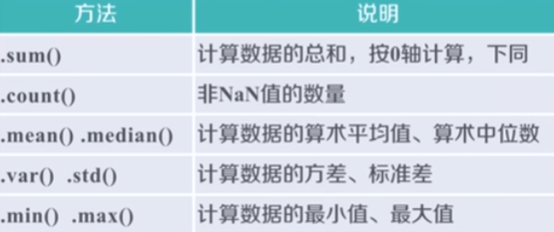

### 只适用于Series类型

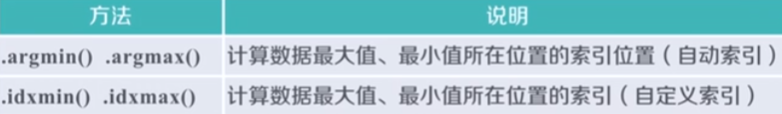

### 适用于Series和DataFrame类型的

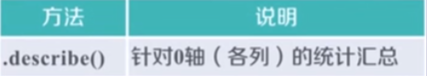

In [49]:
a=pd.Series([9,8,7,6],index = ['a','b','c','d'])

In [50]:
a

a    9
b    8
c    7
d    6
dtype: int64

##### 对Series类型使用时，describe()是一个Series类型的，所以可以使用Series的方法

In [51]:
a.describe()

count    4.000000
mean     7.500000
std      1.290994
min      6.000000
25%      6.750000
50%      7.500000
75%      8.250000
max      9.000000
dtype: float64

In [52]:
a.describe()['count']

4.0

In [56]:
a.describe()['max']

9.0


##### 对dataframe格式使用时，此时的describe()是一个dataframe格式

    按列获取

In [58]:
b

,0,1,2,3,4
c,0,1,2,3,4
a,5,6,7,8,9
d,10,11,12,13,14
b,15,16,17,18,19


In [57]:
b.describe()

,0,1,2,3,4
count,4.000000,4.000000,4.000000,4.000000,4.000000
mean,7.500000,8.500000,9.500000,10.500000,11.500000
std,6.454972,6.454972,6.454972,6.454972,6.454972
min,0.000000,1.000000,2.000000,3.000000,4.000000
25%,3.750000,4.750000,5.750000,6.750000,7.750000
50%,7.500000,8.500000,9.500000,10.500000,11.500000
75%,11.250000,12.250000,13.250000,14.250000,15.250000
max,15.000000,16.000000,17.000000,18.000000,19.000000


In [59]:
b.describe().loc['max']
#获取行元素

0    15.0
1    16.0
2    17.0
3    18.0
4    19.0
Name: max, dtype: float64

In [61]:
b.describe()[2]
#获取列元素

count     4.000000
mean      9.500000
std       6.454972
min       2.000000
25%       5.750000
50%       9.500000
75%      13.250000
max      17.000000
Name: 2, dtype: float64

# 累计统计分析

适用于Series和DataFrame类型

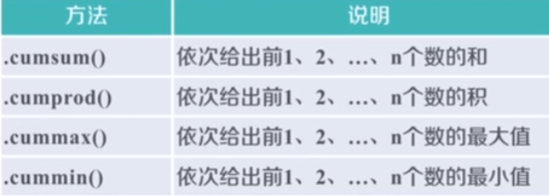

窗口函数

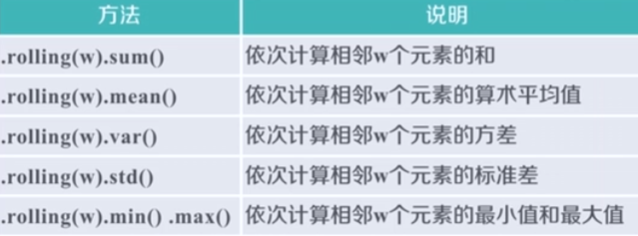

In [62]:
b

,0,1,2,3,4
c,0,1,2,3,4
a,5,6,7,8,9
d,10,11,12,13,14
b,15,16,17,18,19


In [63]:
b.cumsum()

,0,1,2,3,4
c,0,1,2,3,4
a,5,7,9,11,13
d,15,18,21,24,27
b,30,34,38,42,46


In [64]:
b.cumprod()

,0,1,2,3,4
c,0,1,2,3,4
a,0,6,14,24,36
d,0,66,168,312,504
b,0,1056,2856,5616,9576


##### 在纵向上，以两个元素为单位进行求和运算

In [65]:
b.rolling(2).sum()

,0,1,2,3,4
c,NaN,NaN,NaN,NaN,NaN
a,5.0,7.0,9.0,11.0,13.0
d,15.0,17.0,19.0,21.0,23.0
b,25.0,27.0,29.0,31.0,33.0


# 相关分析

什么是相关性

  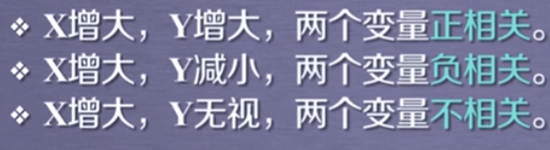 
   
协方差

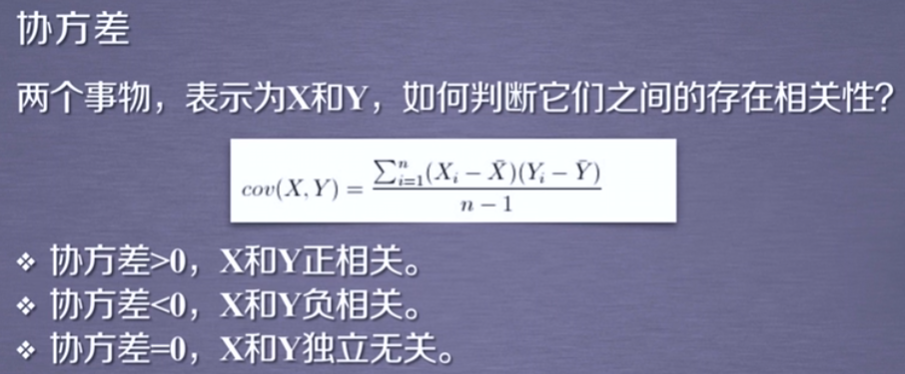

## Pearson相关系数

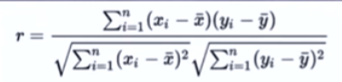

r取值范围【-1，1】

    极强相关 0.8-1.0
    强相关 0.6-0.8
    中等强度相关 0.4-0.6
    弱相关 0.2-0.4
    极弱相关或无相关 0.0-0.2
    
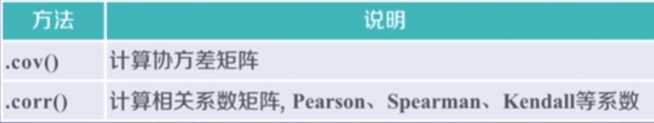


In [67]:
hprice = pd.Series([3.04,22.93,12.75,22.6,12.33],
                   index=['2008','2009','2010','2011','2012'])

In [69]:
m2 = pd.Series([8.18,18.38,9.13,7.82,6.69],index=['2008','2009','2010','2011','2012'])

In [70]:
hprice.corr(m2)

0.5239439145220387